
<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto Final

**Fecha de Entrega**: 06 de Agosto de 2024

**Objetivos:**
  - Aplicar los conceptos aprendidos en clases.
  - Realizar el análisis de un dataset de su preferencia.
  - Familiarizarse con el manejo de versiones a través de Git

**Puntaje Total:** 24 Puntos

**Nombre Estudiante(s)**: `Jeanette León Vejar`

**Link Github**: [GitHub Proyecto Final](https://github.com/JeanetteLeon/Python_Proyecto_Final)

#### Selección de dataset: `IMDb Top 10000 Movies Dataset`



Este dataset consta de una colección meticulosa de 10 mil largometrajes recopilados de IMDb, una de las fuentes de información cinematográfica más populares y autorizadas. Las películas incluidas en este conjunto de datos están ordenadas según sus calificaciones de IMDb en orden descendente. El conjunto de datos cubre una amplia gama de géneros, directores y estrellas, y proporciona una descripción general completa de películas de gran prestigio en varias categorías. El proceso de extracción se realizó el 17 de junio de 2023.

Link Kaggle: [IMDb Top 10000 Movies Dataset](https://www.kaggle.com/datasets/moazeldsokyx/imdb-top-10000-movies-dataset)

<div>
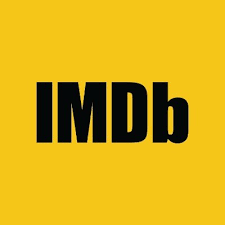
</div>



## Inspección de datos 

#### A continuación se describen las columnas del dataset, donde se menciona qué representa y el tipo de dato:

- `ID` (integer): Identificador único para cada película en el conjunto de datos.
- `Movie Name` (string): El título de la película.
- `Rating` (float): La calificación de IMDb para la película.
- `Runtime` (string): La duración de la película en minutos.
- `Genre` (string): El género al que pertenece la película.
- `Metascore` (float): La calificación de Metascore para la película (si está disponible).
- `Plot` (string): Un breve resumen o descripción de la trama de la película.
- `Directors` (string): El director o directores de la película.
- `Stars` (string):  El elenco principal o los actores que aparecen en la película.
- `Votes` (integer): La cantidad de votos/calificaciones que recibió la película.
- `Gross` (integer): Los ingresos brutos generados por la película (si está disponible).
- `Link` (string): El enlace de IMDb para acceder a los detalles completos e información adicional sobre la película.

#### Revisión de nulos:

- Hemos encontrado que en el campo `Metascore` tiene 2.007 nulos, equivalentes al 20% de universo del dataset, sin embargo es pausible esta evaluación tenga datos nulos, ya que se calcula a partir de las reseñas de películas hechas por un gran grupo de críticos más respetados en esta industria. Entonces pueden existir peliculas que no tengas estas criticas a gran escala y que sigan siendo populares en la audiencia.


#### Revisión de duplicados:

- `ID` (integer): No tiene duplicados.
- `Movie Name` (string): 703 duplicados.
- `Rating` (float): 9997 duplicados.
- `Runtime` (string): 9968 duplicados.
- `Genre` (string): 9883 duplicados.
- `Metascore` (float): 9997 duplicados.
- `Plot` (string): 8 duplicados.
- `Directors` (string): 56 duplicados.
- `Stars` (string):  85 duplicados.
- `Votes` (integer): 1405 duplicados.
- `Gross` (integer): 532 duplicados.
- `Link` (string): No tiene duplicados

Se halló que `ID` y `Link` no tiene duplicados, lo que está bien ya que son valores únicos para una película.
Además, de que los campos `Rating`, `Runtime`, `Genre`, `Metascore`, `Directors`, `Stars`, `Votes` y `Gross` tienen duplicados, ya que pueden repetirse en más de una película.


Por último, hemos encontrado que `Movie Name` y `Plot` si tiene duplicados, y se generó una revisión y se exportó los resultados en un excel para analizar en más detalle estos casos. Se constata que son películas diferentes, ya que el los actores y directores son diferentes en cada caso. Para validar lo anterior, se creó una función "validar_duplicados" en donde se crea una clave, la cual concatena los campos de `Movie Name`, `Plot`, `Directors`, `Stars`, y se filtra por valores duplicados de esta concatenación, la cual no hubieron casos. 

En conclusión no se deberían de eliminar los duplicados para los campos `Movie Name` y `Plot`, ya que hacen referencia a peliculas diferentes, como oportunidad de mejora al dataset se debería añadir el año de estreno, para poder identificar los remakes.

#### Revisión de outliers de campos numéricos:

- `ID` (integer): No tiene outliers.
- `Rating` (float): Tiene outliers pero están dentro del intervalo de 0 a 10.
- `Metascore` (float): Tiene outliers pero están dentro del intervalo de 0 a 100.
- `Votes` (integer): Tiene outliers extremos, se deberían crear una nueva varaible que expresa la cifra en miles o millones, para entender de mejor manera las diferencia en la distribución de votos y revisar si hay que hacer un tratamiento de outliers, esto verá en el siguiente apartado de limpieza de datos.
- `Gross` (integer): Tiene outliers extremos, se deberían crear una nueva varaible que expresa la cifra en miles o millones, para entender de mejor manera las diferencia en la distribución de ganancia, hay un dato mínimo de 7 dólares de ganancia (ese dato se podria eliminar o definir un monto mínimo que este acorde con el promedio, esto se verá en el siguiente apartado de limpienza de datos).






In [65]:
# Librerías

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
# Se guarda en una varible el dataset de análisis
dataset = pd.read_csv('../data/Top_10000_Movies_IMDb.csv')

dataset

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/
2,3,Ramayana: The Legend of Prince Rama,9.2,135 min,"Animation, Action, Adventure",NaN,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/
3,4,The Chaos Class,9.2,87 min,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/
4,5,Daman,9.1,121 min,"Adventure, Drama",NaN,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,Yogi Bear,4.6,80 min,"Animation, Adventure, Comedy",35.0,A documentary filmmaker travels to Jellystone ...,"['Eric Brevig', 'Dan Aykroyd', 'Justin Timberl...","['Dan Aykroyd', 'Justin Timberlake', 'Anna Far...",22762,100246011,https://www.imdb.com/title/tt1302067/
9995,9996,Troll,4.6,82 min,"Comedy, Fantasy, Horror",30.0,A wicked troll king in search of a mystical ri...,"['John Carl Buechler', 'Michael Moriarty', 'Sh...","['Michael Moriarty', 'Shelley Hack', 'Noah Hat...",10948,5450815,https://www.imdb.com/title/tt0092115/
9996,9997,Paranormal Activity 4,4.6,88 min,"Horror, Mystery",40.0,It has been five years since the disappearance...,"['Henry Joost', 'Ariel Schulman', 'Stephen Dun...","['Ariel Schulman', 'Stephen Dunham', 'Katie Fe...",68430,53921300,https://www.imdb.com/title/tt2109184/
9997,9998,Dark Crimes,4.6,92 min,"Crime, Drama, Mystery",24.0,A murder investigation of a slain businessman ...,"['Alexandros Avranas', 'Jim Carrey', 'Marton C...","['Jim Carrey', 'Marton Csokas', 'Charlotte Gai...",19098,19098,https://www.imdb.com/title/tt1901024/


In [67]:
# Identicar los tipos de datos de cada columna del dataset

dataset.dtypes

ID              int64
Movie Name     object
Rating        float64
Runtime        object
Genre          object
Metascore     float64
Plot           object
Directors      object
Stars          object
Votes           int64
Gross           int64
Link           object
dtype: object

In [68]:
# Revisión de nulos
print(dataset.isnull().sum())


ID               0
Movie Name       0
Rating           0
Runtime          0
Genre            0
Metascore     2007
Plot             0
Directors        0
Stars            0
Votes            0
Gross            0
Link             0
dtype: int64


In [69]:
# Revisión de duplicados de cada columna de un dataset

def contar_duplicados(dataset):
    resumen_duplicados = {}
    for column in dataset.columns:
        contar_duplicados = dataset[column].duplicated(keep=False).sum()  # Count all duplicates
        resumen_duplicados[column] = contar_duplicados
    return resumen_duplicados

# Generar el resumen
resumen_duplicados = contar_duplicados(dataset)

# Mostrar resultado
resumen_duplicados


{'ID': 0,
 'Movie Name': 703,
 'Rating': 9997,
 'Runtime': 9968,
 'Genre': 9883,
 'Metascore': 9997,
 'Plot': 8,
 'Directors': 56,
 'Stars': 85,
 'Votes': 1405,
 'Gross': 532,
 'Link': 0}

In [70]:
# Revisión de duplicados en el campo "Movie"

duplicados_movie = dataset[dataset['Movie Name'].duplicated(keep=False)]
duplicados_movie = duplicados_movie.sort_values(by='Movie Name')

duplicados_movie

# Exportar resultado en excel
# duplicados_movie.to_excel('../output/duplicados/duplicados_movie.xlsx', index=False) 

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
7835,7836,13,6.0,91 min,"Crime, Drama, Thriller",29.0,A naive young man assumes a dead man's identit...,"['Géla Babluani', 'Sam Riley', 'Alice Barrett'...","['Sam Riley', 'Alice Barrett', 'Gaby Hoffmann'...",42969,42969,https://www.imdb.com/title/tt0798817/
2802,2803,13,7.3,93 min,"Crime, Drama, Thriller",61.0,A man takes over a dead man's task without rea...,"['Géla Babluani', 'George Babluani', 'Aurélien...","['George Babluani', 'Aurélien Recoing', 'Pasca...",17764,121390,https://www.imdb.com/title/tt0475169/
1511,1512,3:10 to Yuma,7.6,92 min,"Drama, Thriller, Western",80.0,Broke small-time rancher Dan Evans is hired by...,"['Delmer Daves', 'Glenn Ford', 'Van Heflin', '...","['Glenn Ford', 'Van Heflin', 'Felicia Farr', '...",20854,20854,https://www.imdb.com/title/tt0050086/
1112,1113,3:10 to Yuma,7.7,122 min,"Action, Crime, Drama",76.0,A small-time rancher agrees to hold a captured...,"['James Mangold', 'Russell Crowe', 'Christian ...","['Russell Crowe', 'Christian Bale', 'Ben Foste...",320936,53606916,https://www.imdb.com/title/tt0381849/
4725,4726,A Christmas Carol,6.8,96 min,"Animation, Adventure, Comedy",55.0,An animated retelling of Charles Dickens' clas...,"['Robert Zemeckis', 'Jim Carrey', 'Gary Oldman...","['Jim Carrey', 'Gary Oldman', 'Colin Firth', '...",122534,137855863,https://www.imdb.com/title/tt1067106/
...,...,...,...,...,...,...,...,...,...,...,...,...
1908,1909,Wuthering Heights,7.5,104 min,"Drama, Romance",NaN,A servant in the house of Wuthering Heights te...,"['William Wyler', 'Merle Oberon', 'Laurence Ol...","['Merle Oberon', 'Laurence Olivier', 'David Ni...",18988,762484,https://www.imdb.com/title/tt0032145/
5654,5655,Wuthering Heights,6.6,105 min,"Drama, History, Romance",NaN,A man becomes obsessed with vengeance when his...,"['Peter Kosminsky', 'Juliette Binoche', 'Ralph...","['Juliette Binoche', 'Ralph Fiennes', 'Janet M...",13923,13923,https://www.imdb.com/title/tt0104181/
7862,7863,Wuthering Heights,6.0,129 min,"Drama, Romance",70.0,A poor boy of unknown origins is rescued from ...,"['Andrea Arnold', 'Kaya Scodelario', 'James Ho...","['Kaya Scodelario', 'James Howson', 'Solomon G...",10701,96889,https://www.imdb.com/title/tt1181614/
1226,1227,Zulu,7.7,138 min,"Drama, History, War",77.0,Outnumbered British soldiers do battle with Zu...,"['Cy Endfield', 'Stanley Baker', 'Jack Hawkins...","['Stanley Baker', 'Jack Hawkins', 'Ulla Jacobs...",40987,40987,https://www.imdb.com/title/tt0058777/


In [71]:
# Revisión de duplicados en el campo "Plot"

duplicados_plot = dataset[dataset['Plot'].duplicated(keep=False)]
duplicados_plot = duplicados_plot.sort_values(by='Plot')

duplicados_plot

# Exportar resultado en excel
# duplicados_plot.to_excel('../output/duplicados/duplicados_plot.xlsx', index=False) 

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
514,515,Aladdin,8.0,90 min,"Animation, Adventure, Comedy",86.0,A kind-hearted street urchin and a power-hungr...,"['Ron Clements', 'John Musker', 'Scott Weinger...","['John Musker', 'Scott Weinger', 'Robin Willia...",438504,217350219,https://www.imdb.com/title/tt0103639/
4111,4112,Aladdin,6.9,128 min,"Adventure, Comedy, Family",53.0,A kind-hearted street urchin and a power-hungr...,"['Guy Ritchie', 'Will Smith', 'Mena Massoud', ...","['Will Smith', 'Mena Massoud', 'Naomi Scott', ...",277119,355559216,https://www.imdb.com/title/tt6139732/
1544,1545,Superman II: The Richard Donner Cut,7.6,115 min,"Action, Adventure, Romance",NaN,Superman agrees to sacrifice his powers to sta...,"['Richard Donner', 'Richard Lester', 'Gene Hac...","['Richard Lester', 'Gene Hackman', 'Christophe...",17988,17988,https://www.imdb.com/title/tt0839995/
4597,4598,Superman II,6.8,127 min,"Action, Adventure, Sci-Fi",83.0,Superman agrees to sacrifice his powers to sta...,"['Richard Lester', 'Richard Donner', 'Gene Hac...","['Richard Donner', 'Gene Hackman', 'Christophe...",111074,108185706,https://www.imdb.com/title/tt0081573/
2586,2587,Lady and the Tramp,7.3,76 min,"Animation, Adventure, Comedy",78.0,The romantic tale of a sheltered uptown Cocker...,"['Clyde Geronimi', 'Wilfred Jackson', 'Hamilto...","['Wilfred Jackson', 'Hamilton Luske', 'Jack Cu...",141741,93600000,https://www.imdb.com/title/tt0048280/
7111,7112,Lady and the Tramp,6.2,111 min,"Adventure, Comedy, Family",48.0,The romantic tale of a sheltered uptown Cocker...,"['Charlie Bean', 'Tessa Thompson', 'Justin The...","['Tessa Thompson', 'Justin Theroux', 'Sam Elli...",23188,23188,https://www.imdb.com/title/tt8096832/
455,456,Pink,8.1,136 min,"Crime, Drama, Thriller",NaN,When three young women are implicated in a cri...,"['Aniruddha Roy Chowdhury', 'Amitabh Bachchan'...","['Amitabh Bachchan', 'Taapsee Pannu', 'Kirti K...",46512,1241223,https://www.imdb.com/title/tt5571734/
1093,1094,Nerkonda Paarvai,7.8,157 min,"Action, Crime, Drama",NaN,When three young women are implicated in a cri...,"['H. Vinoth', 'Ajith Kumar', 'Shraddha Srinath...","['Ajith Kumar', 'Shraddha Srinath', 'Abhirami ...",10402,10402,https://www.imdb.com/title/tt9675716/


In [72]:
# Crear una funcion donde se identifican los duplicados que hacen referencia a una misma película

def validar_duplicados(dataset):
    df = dataset[['Movie Name', 'Plot', 'Directors', 'Stars']]
    df['Clave_dupl'] = df['Movie Name'] + '-' + df['Plot'] + '-' + df['Directors']+ '-' + df['Stars']
    df = df[df['Clave_dupl'].duplicated(keep=False)]
    df = df.sort_values(by='Movie Name')
    
    return df

duplicados_outliers = validar_duplicados(dataset)
duplicados_outliers

C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_11320\1664009657.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Movie Name,Plot,Directors,Stars,Clave_dupl


In [73]:
# Revisión de outliers de datos númericos

dataset.describe().round(1)


,ID,Rating,Metascore,Votes,Gross
count,9999.0,9999.0,7992.0,9999.0,9999.0
mean,5000.0,6.7,58.7,91271.0,28740668.2
std,2886.6,0.9,17.5,168450.8,59719327.8
min,1.0,4.6,7.0,10001.0,7.0
25%,2500.5,6.1,46.0,16785.0,36541.0
50%,5000.0,6.7,59.0,33912.0,4244155.0
75%,7499.5,7.3,71.0,89656.0,33062949.5
max,9999.0,9.3,100.0,2752419.0,936662225.0


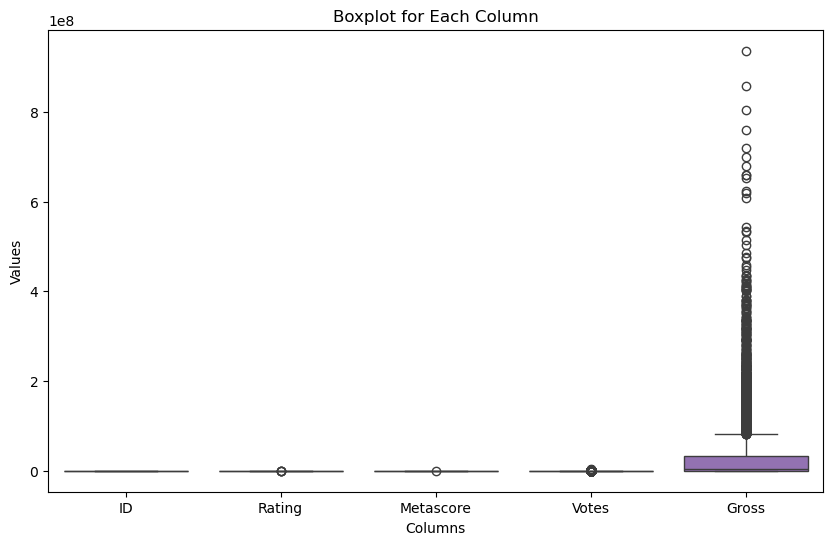

In [74]:
# Visualización general la distribución de los campos númericos

# Tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear un boxplot para cada columna del dataset
sns.boxplot(data=dataset)

# Titulos y etiquetas
plt.title('Boxplot for Each Column')
plt.ylabel('Values')
plt.xlabel('Columns')

# Mostrar boxplot
plt.show()

In [75]:
# Seleccionar sólo columnas númericas
numeric_columns = dataset.select_dtypes(include='number').columns

# Crear un boxplot para cada columna númerica del dataset
for column in numeric_columns:
    fig = px.box(dataset, y=column, title=f'Boxplot de cada campo númerico: {column}')
    fig.show()